# Fashion MNIST Image Classification

## Introduction

In this project, we will build a Convolutional Neural Network (CNN) to classify images from the Fashion MNIST dataset. The Fashion MNIST dataset contains 70,000 grayscale images of 10 different categories of clothing items. Each image is 28x28 pixels in size.

The goal of this project is to train a CNN model to accurately classify these images into their respective categories.

## Importing Libraries

First, we need to import the necessary libraries for our project. We will be using TensorFlow and Keras for building and training our CNN model. Additionally, we will use NumPy for numerical operations and Matplotlib for visualizing the images.

In [17]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

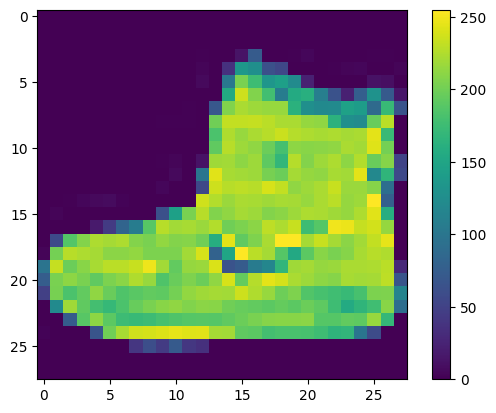

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocessing the Data
Before feeding the images into the CNN, we need to preprocess the data. The pixel values of the images range from 0 to 255. We will normalize these values to a range of 0 to 1 by dividing each pixel value by 255.

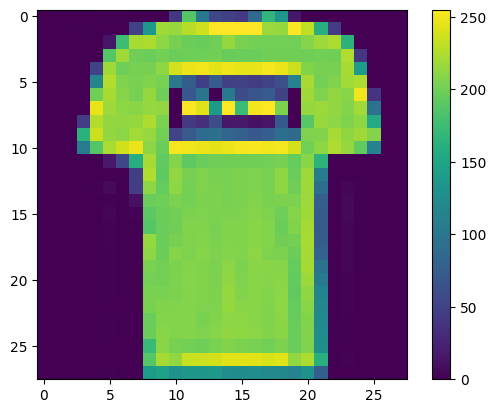

In [10]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

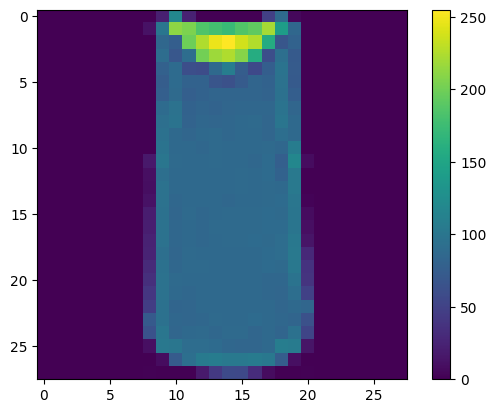

In [11]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

##Visualizing the Training Data
Let's visualize the first 30 images from the training set along with their corresponding labels.

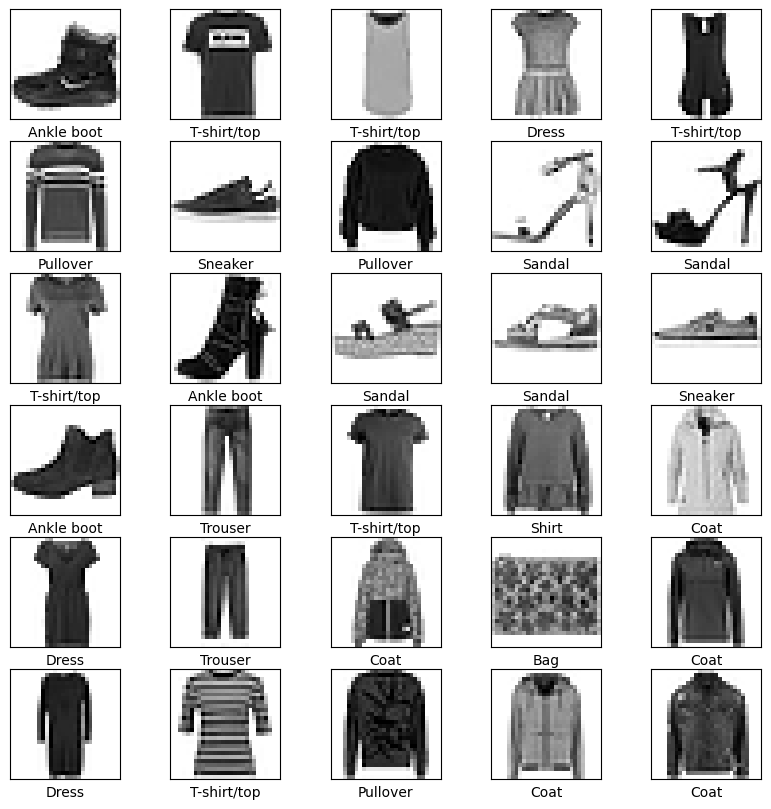

In [15]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Building the CNN Model

In this section, we will build a **Convolutional Neural Network (CNN)** using TensorFlow and Keras. CNNs are ideal for image classification because they automatically learn spatial features like edges, textures, and patterns from images.

### Why Use a CNN?

CNNs process grid-like data (e.g., images) using **convolutional layers** to extract features, **pooling layers** to reduce dimensions, and **fully connected layers** for classification.

### Model Architecture

The CNN model consists of the following layers:

1. **Input Layer**:
   - Input shape: `(28, 28, 1)` for 28x28 grayscale images.

2. **Convolutional Layer 1**:
   - Applies **32 filters** of size `3x3`.
   - Uses `relu` activation for non-linearity.
   - Output shape: `(26, 26, 32)`.

3. **Max Pooling Layer 1**:
   - Performs max pooling with a `2x2` window.
   - Output shape: `(13, 13, 32)`.

4. **Convolutional Layer 2**:
   - Applies **64 filters** of size `3x3`.
   - Uses `relu` activation.
   - Output shape: `(11, 11, 64)`.

5. **Max Pooling Layer 2**:
   - Performs max pooling with a `2x2` window.
   - Output shape: `(5, 5, 64)`.

6. **Convolutional Layer 3**:
   - Applies **64 filters** of size `3x3`.
   - Uses `relu` activation.
   - Output shape: `(3, 3, 64)`.

7. **Flatten Layer**:
   - Flattens the 3D feature map into a 1D vector.
   - Output shape: `(576)`.

8. **Fully Connected Layer 1**:
   - Dense layer with **64 neurons** and `relu` activation.
   - Learns high-level features.

9. **Output Layer**:
   - Dense layer with **10 neurons** (one for each class).
   - Uses `softmax` activation to output class probabilities.



In [18]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

### Key Points

- **Conv2D Layers**: Extract features using filters.
- **MaxPooling2D Layers**: Reduce spatial dimensions for efficiency.
- **Flatten Layer**: Converts 3D feature maps to 1D for dense layers.
- **Dense Layers**: Combine features for classification.
- **Total Parameters**: 93,322 trainable parameters.

### Why This Architecture?

- **Convolutional Layers**: Learn spatial hierarchies of features.
- **Pooling Layers**: Reduce dimensions and prevent overfitting.
- **Fully Connected Layers**: Perform final classification.

This architecture is a standard starting point for image classification tasks and can be improved by adding more layers, using dropout, or tuning hyperparameters.

##Compiling the Model
Next, we will compile the model by specifying the optimizer, loss function, and metrics.

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##Training the Model
We will now train the model using the training data. We will train the model for 10 epochs.

In [20]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 37ms/step - accuracy: 0.7537 - loss: 0.6729 - val_accuracy: 0.8675 - val_loss: 0.3704
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.8792 - loss: 0.3267 - val_accuracy: 0.8881 - val_loss: 0.3096
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.8990 - loss: 0.2766 - val_accuracy: 0.8909 - val_loss: 0.2940
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - accuracy: 0.9113 - loss: 0.2404 - val_accuracy: 0.9016 - val_loss: 0.2707
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9197 - loss: 0.2115 - val_accuracy: 0.9001 - val_loss: 0.2723
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9282 - loss: 0.1950 - val_accuracy: 0.9078 - val_loss: 0.2692
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9383 - loss: 0.1730 - val_accuracy: 0.9027 - val_loss: 0.2830
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 38ms/step - accuracy: 0.9399 -

# Evaluating the Model After Training

After training the model, it's essential to evaluate its performance on a test dataset to understand how well it generalizes to unseen data. The provided code snippet demonstrates this evaluation process.

## Test Accuracy and Loss

The `model.evaluate` function is used to assess the model's performance on the test dataset. This function returns the test loss and test accuracy. In this case, the test accuracy is approximately 90.64%, which indicates that the model correctly classifies around 90.64% of the test images. The test loss is 0.2891, which provides insight into the model's error rate.


In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 3s - 9ms/step - accuracy: 0.9064 - loss: 0.2891

Test accuracy: 0.9064000248908997


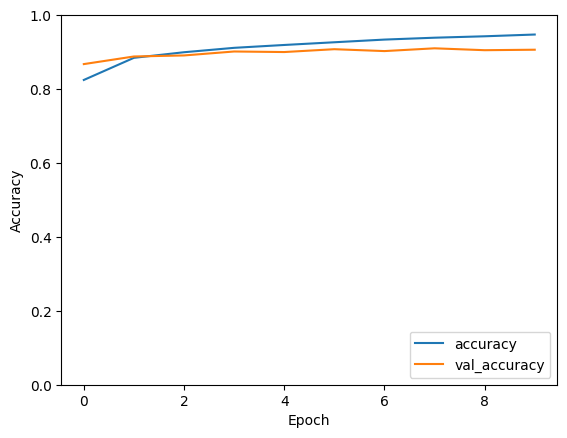

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Making Predictions and Visualizing Results

After training the model, the next step is to make predictions on the test dataset and visualize the results to understand the model's performance.

## Making Predictions

The model is used to predict the class labels for the test images. The `model.predict` function generates predictions, which are then converted from probability distributions to class labels using `np.argmax`.



In [23]:
# Make predictions
predictions = model.predict(test_images)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Compare predictions with actual labels
for i in range(10):  # Display the first 10 predictions
    print(f"Actual: {test_labels[i]}, Predicted: {predicted_labels[i]}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Actual: 9, Predicted: 9
Actual: 2, Predicted: 2
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 6, Predicted: 6
Actual: 1, Predicted: 1
Actual: 4, Predicted: 4
Actual: 6, Predicted: 6
Actual: 5, Predicted: 5
Actual: 7, Predicted: 7


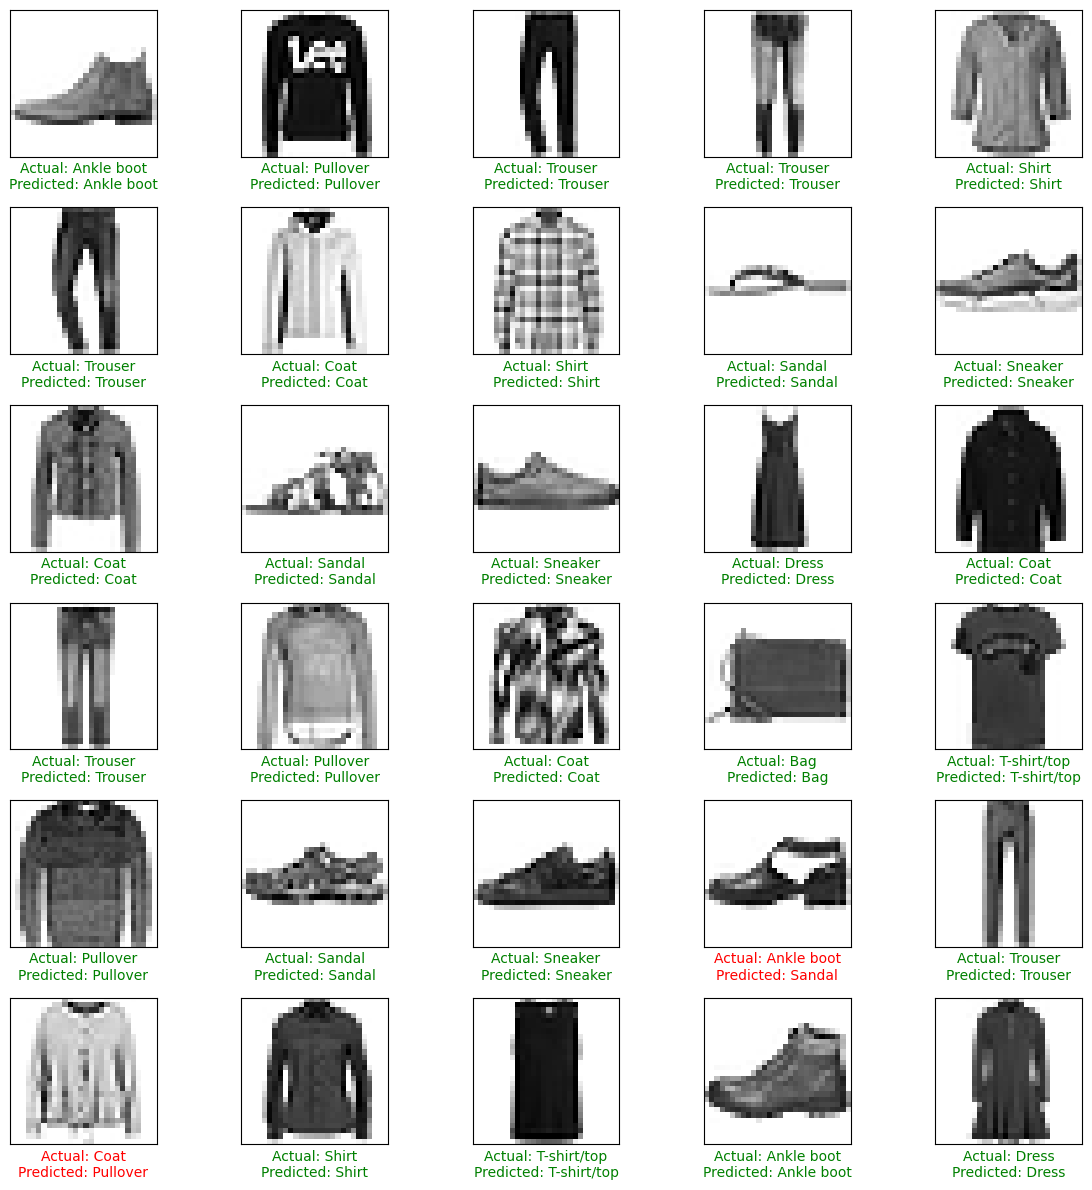

In [26]:
# Plot settings
plt.figure(figsize=(12, 12))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)

    # Determine label color
    if test_labels[i] == predicted_labels[i]:
        label_color = 'green'
    else:
        label_color = 'red'

    # Display class names
    actual_class = class_names[test_labels[i]]
    predicted_class = class_names[predicted_labels[i]]

    plt.xlabel(f"Actual: {actual_class}\nPredicted: {predicted_class}", color=label_color)

plt.tight_layout()
plt.show()

##Conclusion
The predictions and visualizations demonstrate the model's ability to classify test images accurately. The color-coded labels provide immediate feedback on the model's performance, highlighting both correct and incorrect predictions. This step is crucial for identifying any patterns or specific classes where the model may need improvement.